<a href="https://colab.research.google.com/github/Bigarato12/BarbeariaBiga/blob/main/Previsao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import os

In [7]:
# Diretório onde os arquivos estão armazenados (caso use o Google Drive, monte o drive antes)
directory = "/content/Dados_Combustivel/Anos/Todos"

In [8]:
# Lista todos os arquivos CSV na pasta
files = [f for f in os.listdir(directory) if f.endswith(".csv")]

df_list = []
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, delimiter=';', encoding='latin1')  # Ajuste o delimitador se necessário
    df_list.append(df)

<ipython-input-8-169e25f3fa57>:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';', encoding='latin1')  # Ajuste o delimitador se necessário


In [9]:
# Concatenar todos os arquivos em um único dataframe
df = pd.concat(df_list, ignore_index=True)

In [41]:
df.head(10)  # Mostra as 10 primeiras linhas

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,NaN,STIEP,41770-395,GNV,02/01/2018,"2,37","1,7383",R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,NaN,STIEP,41770-395,DIESEL S10,02/01/2018,"3,24","3,1366",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,NaN,STIEP,41770-395,ETANOL,02/01/2018,"2,93","2,6194",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,NaN,STIEP,41770-395,GASOLINA,02/01/2018,"3,62","3,6017",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GNV,02/01/2018,"2,699",NaN,R$ / m³,BRANCA
5,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,ETANOL,02/01/2018,"3,699",NaN,R$ / litro,BRANCA
6,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,NaN,CENTRO,92310-000,GASOLINA,02/01/2018,"4,159",NaN,R$ / litro,BRANCA
7,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,DIESEL S10,03/01/2018,"3,39",NaN,R$ / litro,BRANCA
8,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,DIESEL,03/01/2018,"3,29",NaN,R$ / litro,BRANCA
9,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,GASOLINA,03/01/2018,"3,989",NaN,R$ / litro,BRANCA


In [35]:
# Ordenar os dados por data
df = df.sort_values(by='Data da Coleta')
df.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
Data da Coleta,,,,,,,,,,,,,,,
01/02/2018,SE,SP,MATAO,AUTO POSTO PRIMAVERA LTDA,52.314.473/0001-67,AVENIDA SIQUEIRA CAMPOS,410,NaN,NOVA MATAO,15990-640,ETANOL,3.0,NaN,R$ / litro,IPIRANGA
01/03/2018,SE,MG,UBERLANDIA,COLETO ALDA E FILHOS LTDA,25.759.283/0004-23,RODOVIA BR-050,S/N,KM: 78;,SAO JORGE,38410-337,ETANOL,3.0,"2,6314",R$ / litro,IPIRANGA
01/03/2018,SE,MG,UBERLANDIA,SAO LUCAS AUTO POSTO LTDA,11.310.545/0001-10,AVENIDA PAULO FIRMINO,440,NaN,JARDIM DAS PALMEIRAS,38412-343,ETANOL,3.0,"2,329",R$ / litro,BRANCA
01/05/2018,N,TO,PARAISO DO TOCANTINS,MEDEIROS COMERCIO VAREJISTA DE COMBUSTIVEIS LTDA,03.775.225/0001-08,AVENIDA TRANSBRASILIANA,961,CX. POSTAL 23,CENTRO,77600-000,DIESEL S10,4.0,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
01/05/2018,NE,SE,LAGARTO,AUTO POSTO ROCHA LTDA.,07.855.647/0001-44,AVENIDA CONTORNO,S/N,NaN,CENTRO,49400-000,GASOLINA,4.0,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
01/05/2018,S,PR,COLOMBO,AUTO POSTO MJR PELANDA LTDA.,03.769.095/0001-09,RODOVIA BR 116,S/N,"KM 85,2",PALMITAL,83413-000,ETANOL,3.0,NaN,R$ / litro,IPIRANGA
01/05/2018,SE,MG,ITAJUBA,POSTO PIRULITO LTDA,21.040.209/0001-59,RUA BELARMINO DE MENEZEZ,40,NaN,SÃO VICENTE,37500-000,ETANOL,3.0,"2,5",R$ / litro,BRANCA
01/05/2018,NE,SE,ITABAIANA,J ALVES & CIA LTDA,13.104.799/0002-99,AVENIDA MANOEL ANTONIO DOS SANTOS,1201,NaN,ROTARY CLUB DE ITABAIANA,49506-021,GASOLINA,4.0,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
02/01/2018,S,RS,GRAMADO,CLAÚDIO JOSÉ GHESLA - ME,94.986.429/0001-43,ESTRADA SERRA GRANDE,S/N,NaN,SERRA GRANDE,95670-000,ETANOL,4.0,NaN,R$ / litro,CHARRUA


In [40]:
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
print(df.columns)
print(df.head(1))


Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')
  Regiao - Sigla Estado - Sigla Municipio                       Revenda  \
0             NE             BA  SALVADOR  PETROBRAS DISTRIBUIDORA S.A.   

       CNPJ da Revenda        Nome da Rua Numero Rua Complemento Bairro  \
0   34.274.233/0015-08  RUA EDISTIO PONDE        474         NaN  STIEP   

         Cep Produto Data da Coleta Valor de Venda Valor de Compra  \
0  41770-395     GNV     02/01/2018           2,37          1,7383   

  Unidade de Medida                      Bandeira  
0           R$ / m³  PETROBRAS DISTRIBUIDORA S.A.  


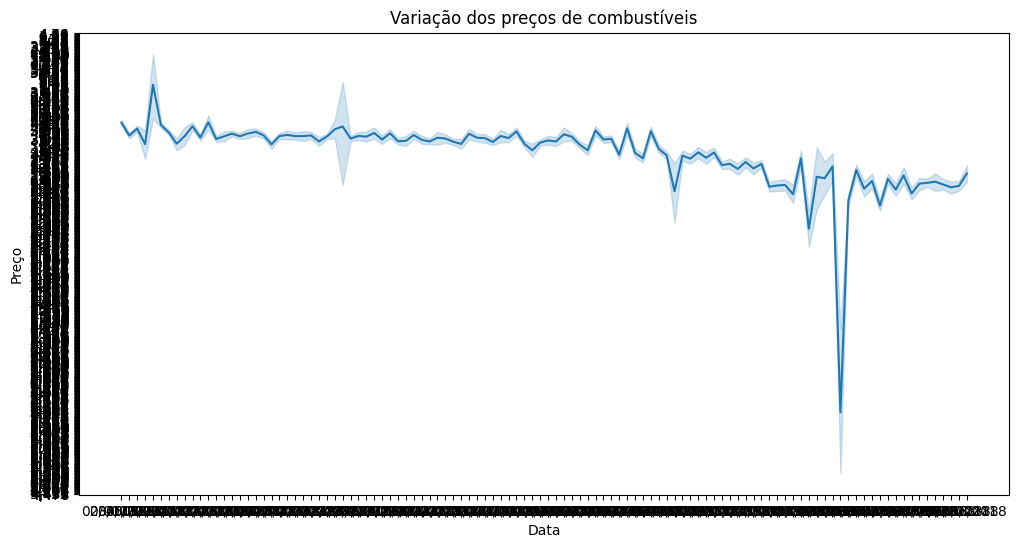

In [42]:
# Visualizar tendência de preços
df.set_index('Data da Coleta', inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Valor de Venda'])
plt.title('Variação dos preços de combustíveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

In [47]:
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')
df = df.dropna(subset=['Valor de Venda'])

In [53]:
# Modelo de previsão ARIMA
train_size = int(len(df) * 0.8)
train, test = df['Valor de Venda'][:train_size], df['Valor de Venda'][train_size:]

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [54]:
# Avaliação do modelo
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.5362914432690731


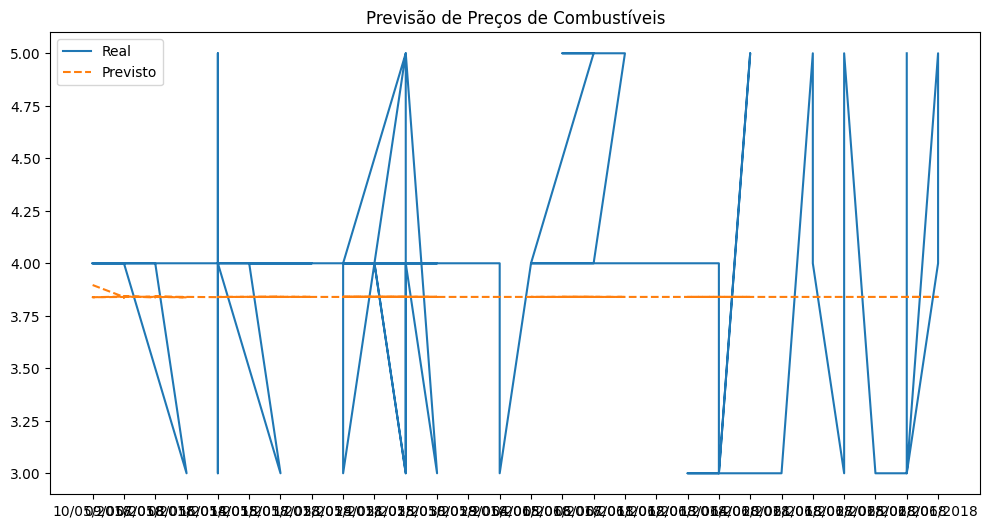

In [55]:
# Plotar previsão
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Previsto', linestyle='dashed')
plt.legend()
plt.title('Previsão de Preços de Combustíveis')
plt.show()

In [52]:
# Prever para o futuro
future_steps = 12  # Exemplo: previsão de 12 períodos à frente
future_forecast = model_fit.forecast(steps=future_steps)
print("Previsão dos próximos 12 períodos:")
print(future_forecast)

Previsão dos próximos 12 períodos:
329    3.646680
330    3.711138
331    3.705113
332    3.798090
333    3.621458
334    3.564760
335    3.668690
336    3.656586
337    3.683502
338    3.679845
339    3.639999
340    3.648766
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
